In [1]:
from polyfit import Polyfit
from paramtune import Paramtune
import json

dummy_fits = Polyfit('dummy_p_coeffs.npz', 'dummy_chi2res.npz', input_h5='inputdata.h5', order=3, cov_npz = 'dummy_cov.npz')
p_guess = [1.7,-1.1]
dummy_tune = Paramtune('target_data.json', p_guess, None, "dummy_p_coeffs.npz", "dummy_chi2res.npz", cov_npz="dummy_cov.npz")

Tuned Parameters:  [ 1.48528662 -0.99660733]


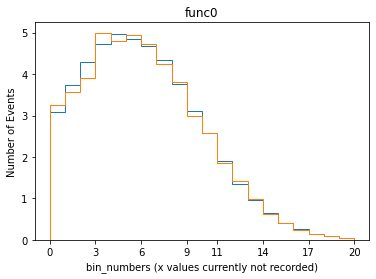

In [4]:
dummy_tune.graph("func0", "test_graph.pdf")